In [ ]:
"""
computer vision problem
엣지 검출 -> 객체 일부 -> 완전 객체 감지
엣지 검출: vertical edge, horizon edge

CNN
분류하고자하는 각각의 클레스에 속하는 이미지들이 공통적으로 가지고있는 특징을 추출(ex.윤곽선)

Computer Vision Problem
엣지 검출(ex: 사람이 서있나 ) -> 객체 일부 -> 완전객체 감지
*엣지 검출 (vertical edge detection) : 6 * 6 행렬일 경우 3*3(filter)을 이용해 6*6행렬의 각 요소(3*3)끼리 곱을 더해서
                                       첫번째 칸에 넣어주고 한칸씩 이동하면서 3*3(filter)을 요소(3*3끼리 곱한값의 합으로 4*4행렬 채워진다.
https://076923.github.io/posts/Python-opencv-29/ :open-cv주소
*패딩 : 6*6행렬의 테두리를 한칸씩 늘려 0으로 채움 -> 이미지로부터 특징을 찾아내는 과정에서 원본 이미지의 크기 줄어드는것 방지
-> Valid : 패딩을 안한다
-> Same : 0으로 테두리 채움 -> 연산 결과도 인풋 이미지랑 동일하게 나옴
-> stride = 2 로 설정하면 두칸씩 이동해서 연산 수행
-> pooling : 특정 영역을 대표하는 대표값을 추출하는 행위, 풀링할때는 일반적으로 겹치지않게
-> Max pooling : pool size를 2,2로 주면 연산 수행된 결과에서 2*2크기로 겹치지 않게 나누고 그 영역에서 가장 큰 값 뽑아냄
-> Average pooling: 영역에서 평균값
- Drop out: 학습할때마다 랜덤하게 특징들을 선택하여 다각도의 측면에서 모델 만들어줌
"""

In [1]:
from tensorflow.keras.models import Sequential #모델만들기위해사용
from tensorflow.keras.layers import Dense #레이어만들기위한
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint #최적의모델
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("datadl2/house_train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [ ]:
#범주형데이터의경우 겟더미즈 사용해주면 쉽게 변환가능

In [12]:
df = pd.get_dummies(df)
df.iloc[0]

Id                          1.0
MSSubClass                 60.0
LotFrontage                65.0
LotArea                  8450.0
OverallQual                 7.0
                          ...  
SaleCondition_AdjLand       0.0
SaleCondition_Alloca        0.0
SaleCondition_Family        0.0
SaleCondition_Normal        1.0
SaleCondition_Partial       0.0
Name: 0, Length: 290, dtype: float64

In [10]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=290)

In [13]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [14]:
df = df.fillna(df.mean())

In [15]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [16]:
df_corr = df.corr()

In [17]:
df_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.037020,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018090,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.009689,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.015818,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009914,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.072074,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084241,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [18]:
df_corr_sort=df_corr.sort_values('SalePrice', ascending=False)

In [19]:
df_corr_sort

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
SalePrice,-0.021917,-0.084284,0.334901,0.263843,0.790982,-0.077856,0.522897,0.507101,0.475241,0.386420,...,-0.027475,0.357509,-0.034895,-0.242598,-0.118069,-0.050686,-0.015525,-0.046480,-0.153990,0.352060
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
GrLivArea,0.008273,0.074853,0.368392,0.263116,0.593007,-0.079686,0.199010,0.287389,0.389893,0.208171,...,-0.022348,0.168368,-0.036522,-0.121102,-0.041173,-0.040208,0.032283,-0.007743,-0.091572,0.163239
GarageCars,0.016570,-0.040110,0.269729,0.154871,0.600671,-0.185758,0.537850,0.420622,0.363778,0.224054,...,-0.044502,0.286290,-0.087089,-0.197458,-0.110124,-0.106443,0.028378,-0.010589,-0.121886,0.282164
GarageArea,0.017634,-0.098672,0.323663,0.180403,0.562022,-0.151521,0.478954,0.371600,0.372567,0.296970,...,-0.041904,0.296671,-0.080601,-0.218665,-0.096837,-0.101277,-0.005458,-0.016173,-0.130874,0.294714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MasVnrType_None,0.024897,-0.023867,-0.121677,-0.032418,-0.397955,0.160227,-0.426399,-0.240784,-0.684299,-0.235217,...,0.024834,-0.172209,0.037687,0.132540,0.039705,0.016873,0.013870,-0.010018,0.094590,-0.169202
GarageFinish_Unf,-0.007513,-0.008807,-0.188336,-0.068099,-0.422479,0.203629,-0.523233,-0.414376,-0.222367,-0.179000,...,-0.001712,-0.238934,-0.007466,0.172316,0.039162,-0.017490,0.062021,0.044406,0.118008,-0.232554
BsmtQual_TA,0.033795,-0.138741,-0.066531,-0.044874,-0.497957,0.280779,-0.631734,-0.495485,-0.187406,-0.121785,...,0.018342,-0.265143,-0.010153,0.161940,0.103767,0.005852,-0.050903,0.060591,0.113021,-0.258953
KitchenQual_TA,-0.014973,-0.010836,-0.136764,-0.031154,-0.553891,0.046947,-0.459792,-0.576964,-0.195807,-0.108876,...,-0.012126,-0.274335,0.045067,0.178612,0.065613,0.025849,0.060068,0.034549,0.128151,-0.273826


In [20]:
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

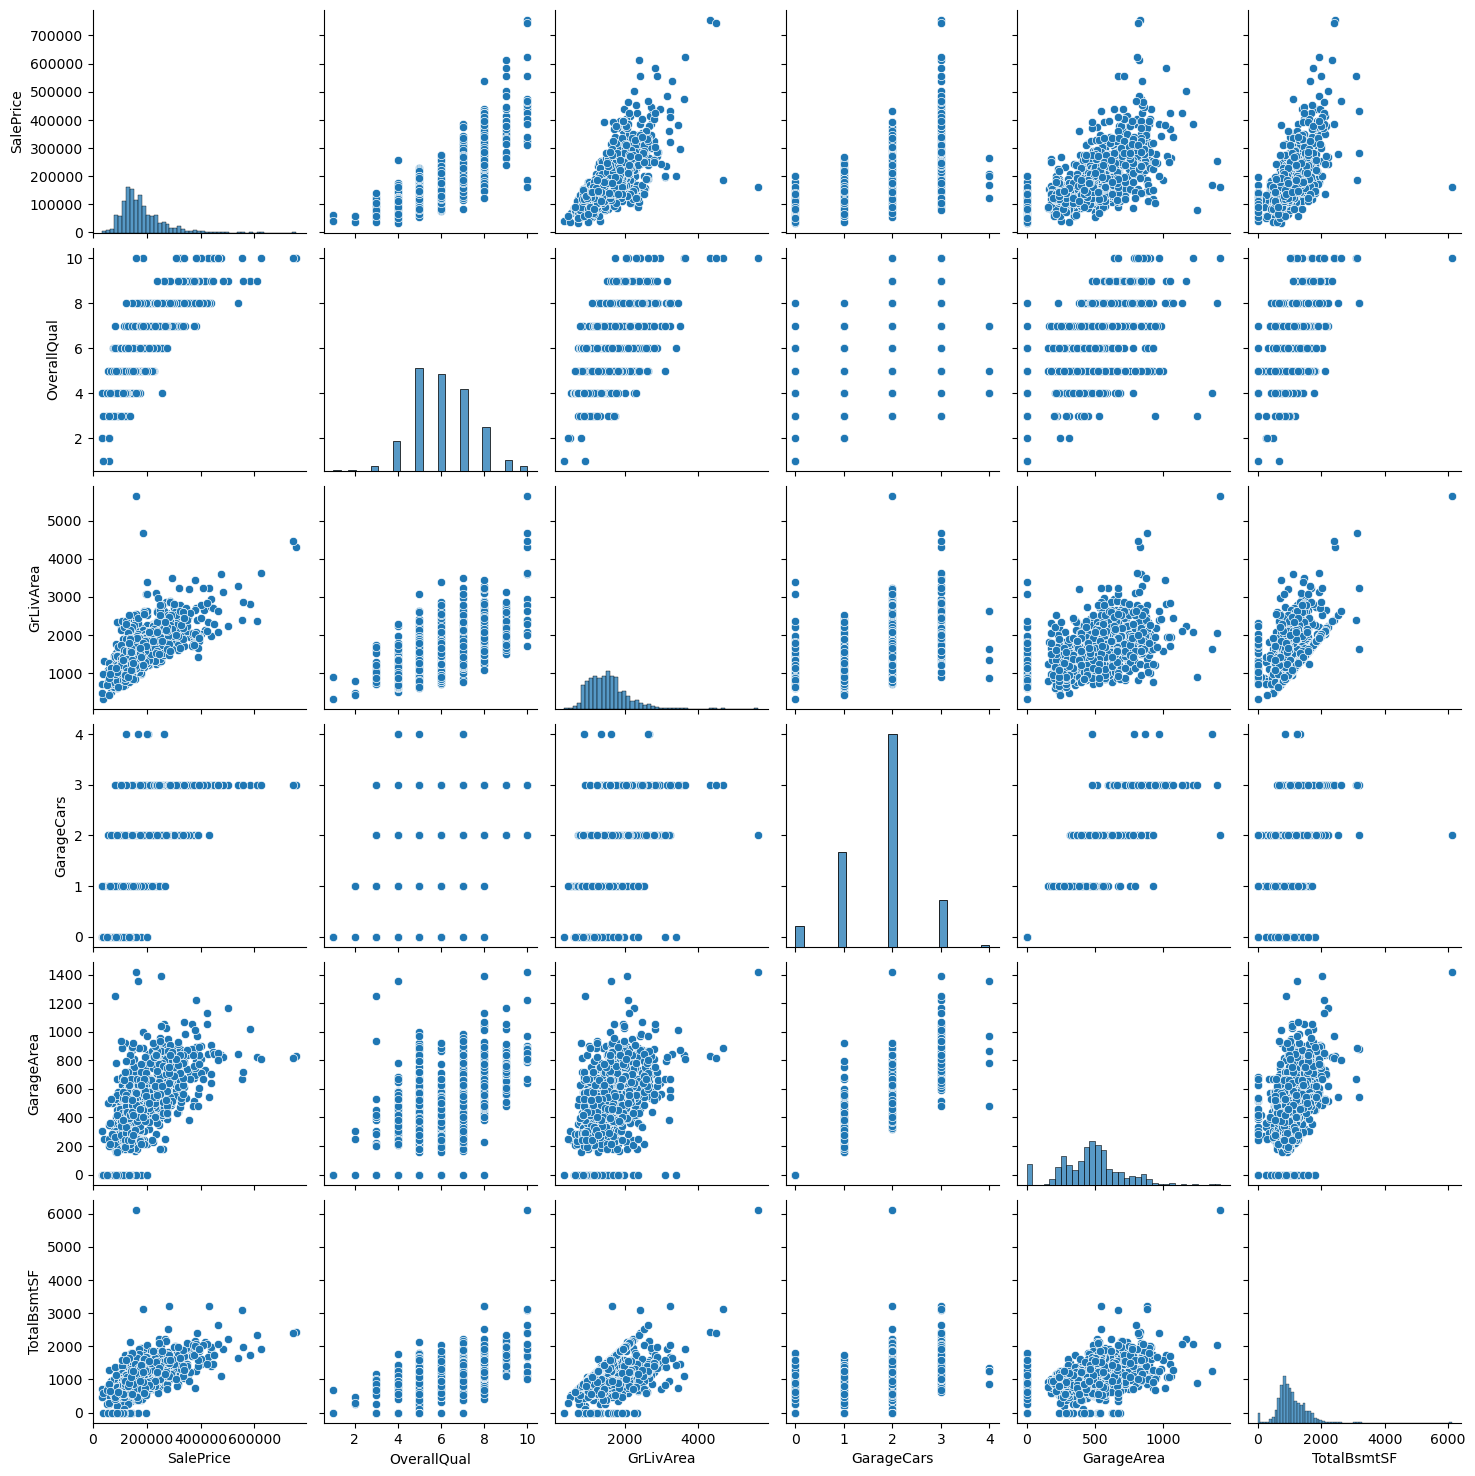

In [21]:
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
sns.pairplot(df[cols])
plt.show()

In [22]:
cols_train=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
X_train_pre = df[cols_train]

In [23]:
X_train_pre

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
0,7,1710,2,548,856
1,6,1262,2,460,1262
2,7,1786,2,608,920
3,7,1717,3,642,756
4,8,2198,3,836,1145
...,...,...,...,...,...
1455,6,1647,2,460,953
1456,6,2073,2,500,1542
1457,7,2340,1,252,1152
1458,5,1078,1,240,1078


In [24]:
y = df['SalePrice'].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [26]:
model = Sequential() #객체생성

In [27]:
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
#노드10개 10차원

In [28]:
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1671 (6.53 KB)
Trainable params: 1671 (6.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
#분류문제일경우에 loss= accuracy
#연속형값을비교할경우 loss= mean_squared_error

In [30]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [31]:
modelpath="./datadl2/model/house_best.hdf5"

In [32]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [33]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2023, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2023
28/28 [==============================] - 1s 8ms/step - loss: 38105870336.0000 - val_loss: 41893376000.0000
Epoch 2/2023
28/28 [==============================] - 0s 3ms/step - loss: 37853913088.0000 - val_loss: 41499193344.0000
Epoch 3/2023
 1/28 [>.............................] - ETA: 0s - loss: 43247865856.0000

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 0s 3ms/step - loss: 37278248960.0000 - val_loss: 40491282432.0000
Epoch 4/2023
28/28 [==============================] - 0s 3ms/step - loss: 35830546432.0000 - val_loss: 38083936256.0000
Epoch 5/2023
28/28 [==============================] - 0s 5ms/step - loss: 32408424448.0000 - val_loss: 32598949888.0000
Epoch 6/2023
28/28 [==============================] - 0s 3ms/step - loss: 25492393984.0000 - val_loss: 22793367552.0000
Epoch 7/2023
28/28 [==============================] - 0s 3ms/step - loss: 15299898368.0000 - val_loss: 10984725504.0000
Epoch 8/2023
28/28 [==============================] - 0s 3ms/step - loss: 5800430592.0000 - val_loss: 3488698112.0000
Epoch 9/2023
28/28 [==============================] - 0s 3ms/step - loss: 2178300928.0000 - val_loss: 2146028672.0000
Epoch 10/2023
28/28 [==============================] - 0s 3ms/step - loss: 1869102848.0000 - val_loss: 2142070400.0000
Epoch 11/2023
28/28 [==============================] - 0s 

Epoch 72/2023
28/28 [==============================] - 0s 2ms/step - loss: 1809287936.0000 - val_loss: 2095377408.0000
Epoch 73/2023
28/28 [==============================] - 0s 3ms/step - loss: 1810277376.0000 - val_loss: 2093857920.0000
Epoch 74/2023
28/28 [==============================] - 0s 2ms/step - loss: 1798761856.0000 - val_loss: 2103746048.0000
Epoch 75/2023
28/28 [==============================] - 0s 3ms/step - loss: 1800587776.0000 - val_loss: 2093075712.0000
Epoch 76/2023
28/28 [==============================] - 0s 2ms/step - loss: 1800774528.0000 - val_loss: 2095538560.0000
Epoch 77/2023
28/28 [==============================] - 0s 2ms/step - loss: 1808650368.0000 - val_loss: 2095582336.0000
Epoch 78/2023
28/28 [==============================] - 0s 3ms/step - loss: 1802273664.0000 - val_loss: 2093053952.0000
Epoch 79/2023
28/28 [==============================] - 0s 2ms/step - loss: 1796352256.0000 - val_loss: 2102528896.0000
Epoch 80/2023
28/28 [===========================

28/28 [==============================] - 0s 2ms/step - loss: 1761156096.0000 - val_loss: 2083891712.0000
Epoch 141/2023
28/28 [==============================] - 0s 4ms/step - loss: 1756745856.0000 - val_loss: 2068693248.0000
Epoch 142/2023
28/28 [==============================] - 0s 2ms/step - loss: 1754699136.0000 - val_loss: 2083195264.0000
Epoch 143/2023
28/28 [==============================] - 0s 2ms/step - loss: 1763159168.0000 - val_loss: 2089501824.0000
Epoch 144/2023
28/28 [==============================] - 0s 2ms/step - loss: 1773208448.0000 - val_loss: 2075336320.0000
Epoch 145/2023
28/28 [==============================] - 0s 2ms/step - loss: 1774061824.0000 - val_loss: 2071026688.0000
Epoch 146/2023
28/28 [==============================] - 0s 2ms/step - loss: 1757380736.0000 - val_loss: 2083771904.0000
Epoch 147/2023
28/28 [==============================] - 0s 2ms/step - loss: 1762052480.0000 - val_loss: 2080279424.0000
Epoch 148/2023
28/28 [==============================] -

In [34]:
real_prices =[]
pred_prices = []
X_num = []


n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

10/10 [==============================] - 0s 997us/step
실제가격: 109000.00, 예상가격: 136792.69
실제가격: 151000.00, 예상가격: 168397.28
실제가격: 91500.00, 예상가격: 97994.47
실제가격: 135000.00, 예상가격: 140018.44
실제가격: 116050.00, 예상가격: 120594.06
실제가격: 130000.00, 예상가격: 170154.19
실제가격: 270000.00, 예상가격: 208563.36
실제가격: 167500.00, 예상가격: 137086.06
실제가격: 118000.00, 예상가격: 106022.99
실제가격: 207500.00, 예상가격: 194781.00
실제가격: 132500.00, 예상가격: 143064.59
실제가격: 277500.00, 예상가격: 223996.03
실제가격: 333168.00, 예상가격: 293967.47
실제가격: 120000.00, 예상가격: 121837.98
실제가격: 145900.00, 예상가격: 179140.09
실제가격: 125500.00, 예상가격: 124236.11
실제가격: 137450.00, 예상가격: 157893.97
실제가격: 131000.00, 예상가격: 150596.09
실제가격: 84500.00, 예상가격: 66292.89
실제가격: 184000.00, 예상가격: 168635.41
실제가격: 143000.00, 예상가격: 125216.66
실제가격: 254900.00, 예상가격: 228039.02
실제가격: 171000.00, 예상가격: 188153.05
실제가격: 148000.00, 예상가격: 132284.28
실제가격: 129000.00, 예상가격: 123024.28


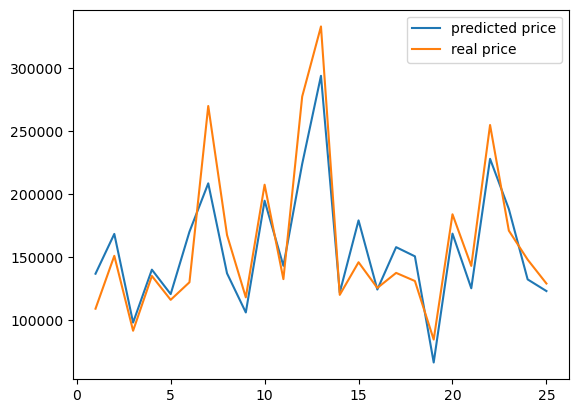

In [35]:
plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()

In [36]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

In [37]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #mnist데이터 다운

11490434/11490434 [==============================] - 1s 0us/step


In [38]:
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [41]:
X_train.shape #(60000, 28, 28)
X_test.shape #(10000, 28, 28)

(10000, 28, 28)

0

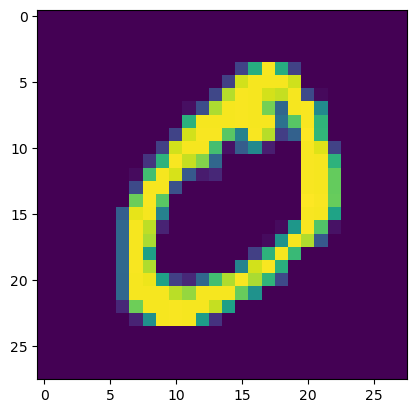

In [46]:
X_train[0] #배열상태

#이미지로 출력하고싶을때 imshow함수 사용
plt.imshow(X_train[1])
y_train[1]

5

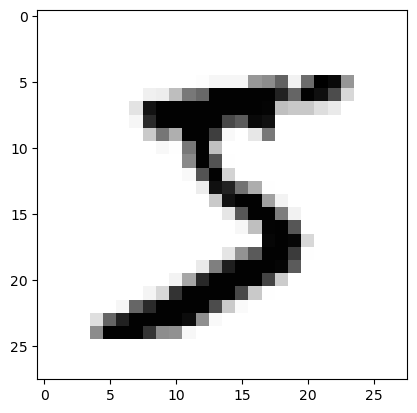

In [49]:
plt.imshow(X_train[0], cmap='Greys')
y_train[0]#정답

In [48]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i) #%-3s 3자리확보하고 출력 픽셀값이 최대3자리까지있어서..
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [ ]:
#일반적인 딥러닝 구조, DNN(ANN)

In [50]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

In [51]:
X_train.shape

(60000, 784)

In [52]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [53]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [54]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [56]:
y_train[:2]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [84]:
model = Sequential()

In [85]:
model.add(Dense(500, input_dim=784, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [86]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 500)               392500    
                                                                 
 dense_12 (Dense)            (None, 10)                5010      
                                                                 
Total params: 397510 (1.52 MB)
Trainable params: 397510 (1.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
784 * 512 + 512

401920

In [88]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [89]:
MODEL_DIR = './datadl2/model/'

In [90]:
modelpath="./data/model/MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [91]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.19211, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.19211 to 0.13263, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13263 to 0.10960, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.10960 to 0.10766, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10766 to 0.09023, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09023 to 0.08925, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 7: val_loss did not improve from 0.08925

Epoch 8: val_loss improved from 0.08925 to 0.08431, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.08431

Epoch 10: val_loss improved from 0.08431 to 0.08209, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 11: val_loss improved from 0.08209 to 0.08067, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 12: val_loss did not impro

In [92]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.0692 - accuracy: 0.9823

 Test Accuracy: 0.9823


In [ ]:
#CNN 구조

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [94]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [95]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
# Conv2D(필터갯수(32), 필터크기, 입력이미지크기, 활성화함수)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #25퍼만큼 드롭되고 75만큼 훈련에참여
model.add(Flatten()) #1차원구조로 펼쳐줌
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [96]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [97]:
modelpath="./datadl2/model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [99]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from 0.04744 to 0.04274, saving model to ./datadl2/model\MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.04274 to 0.04094, saving model to ./datadl2/model\MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.04094 to 0.03954, saving model to ./datadl2/model\MNIST_CNN.hdf5

Epoch 4: val_loss did not improve from 0.03954

Epoch 5: val_loss did not improve from 0.03954

Epoch 6: val_loss did not improve from 0.03954

Epoch 7: val_loss improved from 0.03954 to 0.03947, saving model to ./datadl2/model\MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.03947

Epoch 9: val_loss improved from 0.03947 to 0.03815, saving model to ./datadl2/model\MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.03815

Epoch 11: val_loss improved from 0.03815 to 0.03815, saving model to ./datadl2/model\MNIST_CNN.hdf5

Epoch 12: val_loss did not improve from 0.03815

Epoch 13: val_loss did not improve from 0.03815

Epoch 14: val_loss did not improve from 0.03815

Epoch 15: 

In [100]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.0339 - accuracy: 0.9922

 Test Accuracy: 0.9922


In [145]:
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [147]:
trainy.shape

(60000,)

In [ ]:
'''
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot
'''

In [129]:
trainX.shape

(60000, 28, 28)

In [ ]:
#DNN

In [148]:
trainX = trainX.reshape(trainX.shape[0], 784).astype('float32') / 255
testX = testX.reshape(testX.shape[0], 784).astype('float32') / 255

In [149]:
trainX.shape

(60000, 784)

In [150]:
trainX[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [151]:
trainy = to_categorical(trainy, 10)
testy = to_categorical(testy, 10)

In [152]:
trainy.shape

(60000, 10)

In [109]:
# trainX = trainX.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
# testX = testX.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [135]:
# trainy = to_categorical(trainy)
# testy = to_categorical(testy)

In [160]:
trainy[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [153]:
model = Sequential()

In [154]:
model.add(Dense(500, input_dim=784, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [155]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 500)               392500    
                                                                 
 dense_20 (Dense)            (None, 10)                5010      
                                                                 
Total params: 397510 (1.52 MB)
Trainable params: 397510 (1.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [156]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [157]:
MODEL_DIR = './datadl2/model/'

In [158]:
modelpath="./datadl2/model/MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [159]:
history = model.fit(trainX, trainy, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.46279, saving model to ./datadl2/model\MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.46279 to 0.38774, saving model to ./datadl2/model\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.38774 to 0.36801, saving model to ./datadl2/model\MNIST_MLP.hdf5

Epoch 4: val_loss did not improve from 0.36801

Epoch 5: val_loss improved from 0.36801 to 0.32910, saving model to ./datadl2/model\MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.32910 to 0.31891, saving model to ./datadl2/model\MNIST_MLP.hdf5

Epoch 7: val_loss did not improve from 0.31891

Epoch 8: val_loss improved from 0.31891 to 0.31703, saving model to ./datadl2/model\MNIST_MLP.hdf5

Epoch 9: val_loss improved from 0.31703 to 0.30721, saving model to ./datadl2/model\MNIST_MLP.hdf5

Epoch 10: val_loss improved from 0.30721 to 0.30625, saving model to ./datadl2/model\MNIST_MLP.hdf5

Epoch 11: val_loss improved from 0.30625 to 0.30098, saving model to ./datadl2/model\MNIST_MLP.hdf5

Epoch

In [161]:
print("\n Test Accuracy: %.4f" % (model.evaluate(testX, testy)[1]))

313/313 [==============================] - 1s 1ms/step - loss: 0.3658 - accuracy: 0.8866

 Test Accuracy: 0.8866


In [ ]:
#CNN 구조

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [163]:
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [164]:
trainX.shape

(60000, 28, 28)

In [165]:
(trainX, trainy), (testX, testy) = mnist.load_data()
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1).astype('float32') / 255
testX = testX.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [166]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
# Conv2D(필터갯수(32), 필터크기, 입력이미지크기, 활성화함수)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #25퍼만큼 드롭되고 75만큼 훈련에참여
model.add(Flatten()) #1차원구조로 펼쳐줌
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [167]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [169]:
modelpath="./datadl2/model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [170]:
history = model.fit(trainX, trainy, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.08479, saving model to ./datadl2/model\MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08479 to 0.05706, saving model to ./datadl2/model\MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05706 to 0.04884, saving model to ./datadl2/model\MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.04884 to 0.04366, saving model to ./datadl2/model\MNIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.04366

Epoch 6: val_loss improved from 0.04366 to 0.04121, saving model to ./datadl2/model\MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.04121 to 0.03997, saving model to ./datadl2/model\MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.03997 to 0.03660, saving model to ./datadl2/model\MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.03660

Epoch 10: val_loss did not improve from 0.03660

Epoch 11: val_loss did not improve from 0.03660

Epoch 12: val_loss did not improve from 0.03660

Epoch 13: val_loss did not improve from 0.03660

Epoch 14: v

In [171]:
print("\n Test Accuracy: %.4f" % (model.evaluate(testX, testy)[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.0279 - accuracy: 0.9928

 Test Accuracy: 0.9928
